# New York Taxi Trips Dataset Exploratory Analysis 
This dataset represents a detailed compilation of trips made using yellow taxis in New York City. The data encapsulates a wide range of information, from pickup and drop_off times to fare amounts and payment types, offering a comprehensive view into urban mobility and the economics of taxi rides within the city.

<img src="https://media.timeout.com/images/105785000/750/422/image.webp" width=600 alt="taxxi image"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
os.chdir('./Data/')

In [3]:
# Reading the File
df = pd.read_csv('Taxi Datset.csv',header =0)
df.head()

C:\Users\gamin\AppData\Local\Temp\ipykernel_7468\69987441.py:2: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Taxi Datset.csv',header =0)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
# Getting the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11916667 entries, 0 to 11916666
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               object 
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           float64
 8   DOLocationID           float64
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(14), object(4)
memory usage: 1.6+ GB


# 1) Cleaning the Data
<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*aDiW2KddpHmTF3uAiibTCQ.png
" width=600 alt="taxxi image"/>

In [5]:
# Dropping the duplicate and na values
df.drop_duplicates(inplace=True)
df.dropna(how='any',inplace=True)

In [6]:
df.drop(['store_and_fwd_flag','PULocationID','DOLocationID'],axis=1,inplace = True)

In [7]:
df.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5


In [8]:
s  = '01/01/2020 12:33:03 AM'
' '.join(s.split()[0:2])

'01/01/2020 12:33:03'

In [9]:
# Changing the datatypes
df['VendorID'] = pd.to_numeric(df['VendorID'], downcast='integer')
#df['tpep_pickup_datetime'].transform(lambda x: ' '.join(x.split()[0:1]))
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'],infer_datetime_format=True,
                                            format = "%m/%d/%Y %X %p" )
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'],infer_datetime_format=True,
                                             format = "%m/%d/%Y %X %p")

C:\Users\gamin\AppData\Local\Temp\ipykernel_7468\566458933.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'],infer_datetime_format=True,
C:\Users\gamin\AppData\Local\Temp\ipykernel_7468\566458933.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'],infer_datetime_format=True,


In [10]:
df['passenger_count'] = df['passenger_count'].astype(np.int16)
df['RatecodeID'] = df['RatecodeID'].astype(np.int16)
df['payment_type'] = df['RatecodeID'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11825214 entries, 0 to 11916661
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int8          
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int16         
 4   trip_distance          float64       
 5   RatecodeID             int16         
 6   payment_type           category      
 7   fare_amount            float64       
 8   extra                  float64       
 9   mta_tax                float64       
 10  tip_amount             float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
 14  congestion_surcharge   float64       
dtypes: category(1), datetime64[ns](2), float64(9), int16(2), int8(1)
memory usage: 1.1 GB


In [12]:
# Seeing the null values
df.isna().sum() # -> No Null Values Present  

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

# 2 Data Visualization and Analysis

In [13]:
df['Month']= df['tpep_pickup_datetime'].dt.month
df['Day']= df['tpep_pickup_datetime'].dt.day
df['year']= df['tpep_pickup_datetime'].dt.year

In [14]:
df[['Month','fare_amount']].groupby('Month').count()

,fare_amount
Month,
1,6339630
2,5485369
3,12
4,4
5,9
6,1
7,42
12,147


In [15]:
month_map = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

#### 1) unique values

In [16]:
df['VendorID'].count() # 11825214 unique Values

11825214

#### 2) Vendor ID

In [17]:
df["VendorID"].value_counts()

VendorID
2    7924894
1    3900320
Name: count, dtype: int64

<BarContainer object of 2 artists>

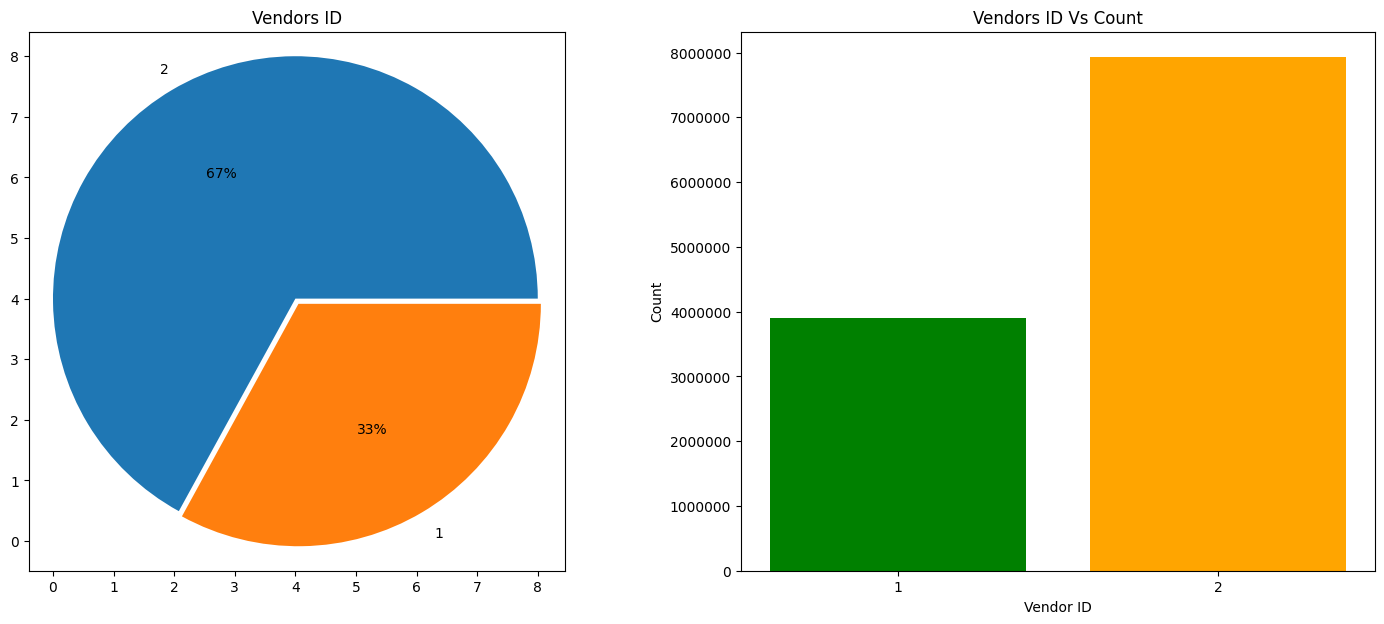

In [18]:
fig ,(ax1,ax2) = plt.subplots(1,2)
fig.set_figheight(7)
fig.set_figwidth(18)

# Plotting
ax1.set_title('Vendors ID')
ax2.set_title('Vendors ID Vs Count')
ax1.pie(x = df["VendorID"].value_counts(),frame=True,center = (4,4),radius = 4,
      labels = df["VendorID"].value_counts().index,explode = (0, 0.1),autopct='%.0f%%')

# bar plot
ax2.set_xlabel('Vendor ID')
ax2.set_ylabel('Count')
ax2.ticklabel_format(axis = 'both',style = 'plain')
ax2.set_xticks(ticks = [1,2], minor=False)
ax2.bar(height = df["VendorID"].value_counts(),x = df['VendorID'].value_counts().index,
        color = ['orange','green'])

#### 4) passengers

In [19]:
# for pie Plot
dff = df['passenger_count'].value_counts()
dff

passenger_count
1    8494455
2    1758003
3     461681
5     418233
6     245829
4     224675
0     222229
7         51
8         32
9         26
Name: count, dtype: int64

In [20]:
# for pie Plot
temp =0
for i in dff.index:
    if dff.loc[i]< 100000:
        temp+= dff.loc[i]
        dff.drop(index=i,axis=0,inplace=True) 
d = pd.DataFrame({'count' : temp},index =['Other'])        
d = pd.concat([d,dff])    
d.index.rename('passenger_count',inplace=True)
if (d.loc['Other'].item()) < 100000:
     d.drop(index = 'Other',inplace =True)
d

,count
passenger_count,
1,8494455
2,1758003
3,461681
5,418233
6,245829
4,224675
0,222229


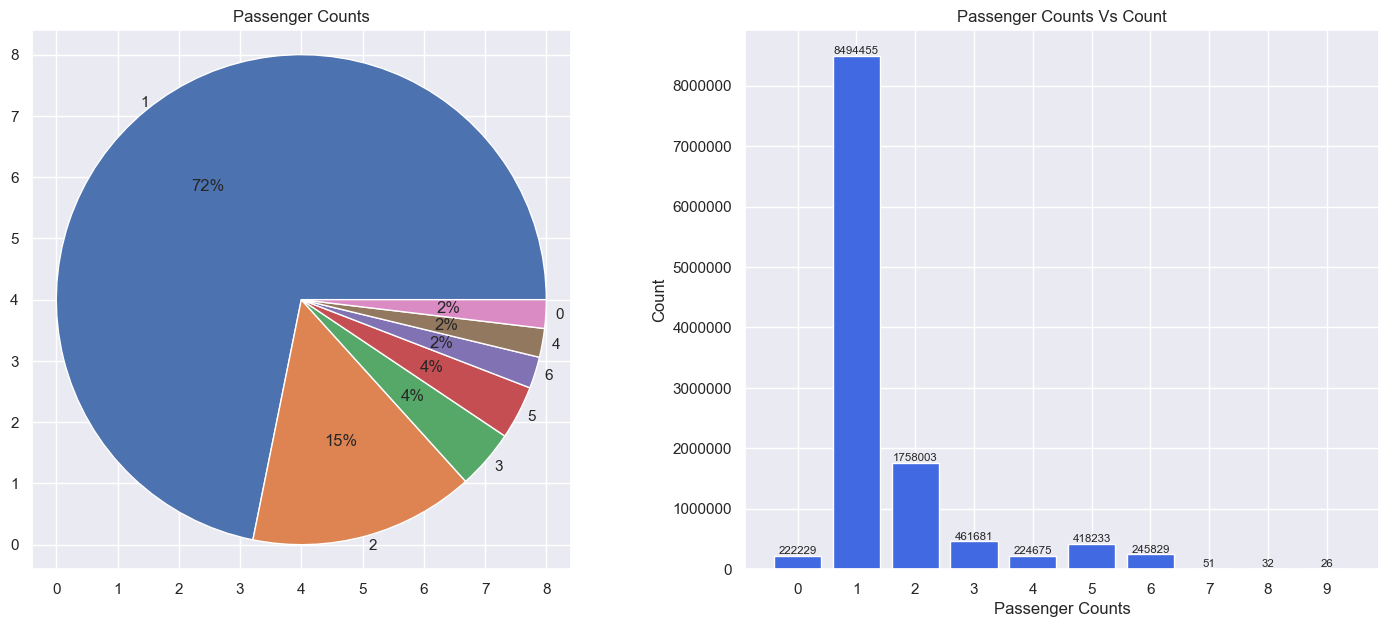

In [21]:
# initialize seaborn
sns.set_theme(context='notebook',style = 'darkgrid')

# making Figure
fig ,(ax1,ax2) = plt.subplots(1,2)
fig.set_figheight(7)
fig.set_figwidth(18)

# Plotting
ax1.set_title('Passenger Counts')
ax2.set_title('Passenger Counts Vs Count')
ax1.pie(x = d['count'],frame=True,center = (4,4),radius = 4,
      labels = d.index,autopct='%.0f%%',pctdistance=0.6
      ,labeldistance = 1.04)

# bar plot
ax2.set_xlabel('Passenger Counts')
ax2.set_ylabel('Count')
ax2.ticklabel_format(axis = 'both',style = 'plain')
ax2.set_xticks(ticks = np.arange(0,10), minor=False)

bars = ax2.bar(height= df["passenger_count"].value_counts(),
        x = df['passenger_count'].value_counts().index,
        color = 'royalblue')

# show values on bars
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom',fontsize = 'x-small')

#### 4) Trip Duration

In [22]:
df['trip_duration'] =   df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Month,Day,year,trip_duration
0,1,2020-01-01 12:28:15,2020-01-01 12:33:03,1,1.2,1,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,1,1,2020,0 days 00:04:48
1,1,2020-01-01 12:35:39,2020-01-01 12:43:04,1,1.2,1,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,1,1,2020,0 days 00:07:25


In [23]:
# get times of time duration
df['trip_duration'].dt.components.head()

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,0,0,4,48,0,0,0
1,0,0,7,25,0,0,0
2,0,0,6,11,0,0,0
3,-1,12,4,51,0,0,0
4,0,0,2,18,0,0,0


In [24]:
# as trip duraion cant be negative so drop them
df = df.drop(index = 
            df[(df['trip_duration'].dt.components['days'] < 0)].index
            )
df.reset_index(inplace=True)

<Axes: ylabel='trip_duration'>

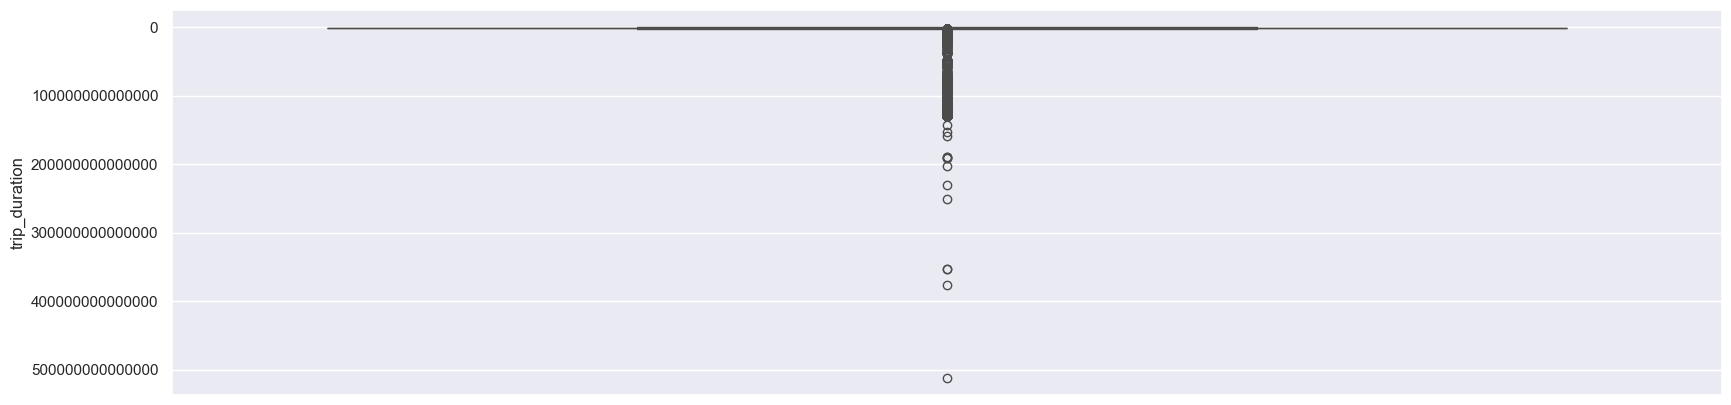

In [25]:
# turn off sc notaion
plt.figure(figsize = (20,5))
plt.ticklabel_format(axis = 'both',style = 'plain')

# BoxPlotting
sns.boxplot(y = df['trip_duration'])

In [26]:
# seeing the values to find trip duration
df['trip_duration'].describe()

count                     11635897
mean     0 days 00:25:48.619754970
std      0 days 02:16:16.464758697
min                0 days 00:00:00
25%                0 days 00:06:23
50%                0 days 00:10:31
75%                0 days 00:16:52
max                5 days 22:05:07
Name: trip_duration, dtype: object

In [27]:
# seeing the values to derive conclusions
d = df[['trip_duration','trip_distance']].groupby(pd.cut(df['trip_duration'],
                   bins = [pd.Timedelta("0 days 00:00:00"), # 0 %
                           pd.Timedelta("0 days 00:06:23"), # 25 %
                           pd.Timedelta("0 days 00:10:31"), # 50 %
                           pd.Timedelta("0 days 00:16:52"), # 75 %
                           pd.Timedelta("5 days 22:05:07")],# 100 %
                   labels= ['0 to 6 min', '6 to 10 min', '10 to 16 min','16 to 22 min']) ).count()
d # seeing the df

C:\Users\gamin\AppData\Local\Temp\ipykernel_7468\1920303084.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = df[['trip_duration','trip_distance']].groupby(pd.cut(df['trip_duration'],


,trip_duration,trip_distance
trip_duration,,
0 to 6 min,2904733,2904733
6 to 10 min,2914532,2914532
10 to 16 min,2902059,2902059
16 to 22 min,2907045,2907045


### **Conclusion** :: 
- 2904733 trips between 0 to 6 min	
- 2914532 trips between 6 to 10 min		
- 2902059 trips between 10 to 16 min	
- 2907045 trips between 0 to 6 min	


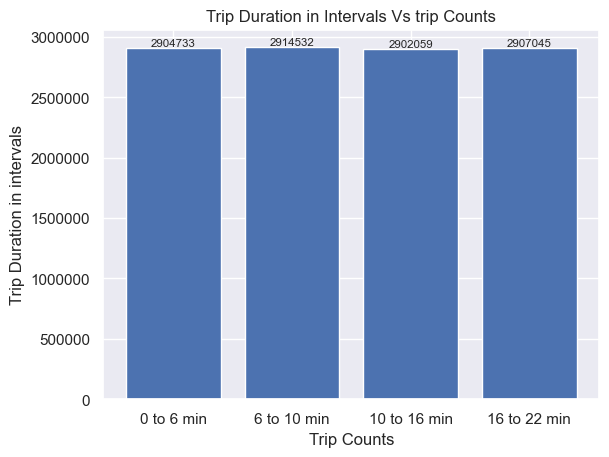

In [28]:
plt.title('Trip Duration in Intervals Vs trip Counts')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration in intervals')
plt.ticklabel_format(axis = 'both',style = 'plain')

# bar plot
bars =plt.bar(height = d['trip_duration'],  x = d.index)


# show values on bars
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom',fontsize = 'x-small')

### 4) trips Per hour

In [29]:
df['Hour'] = df['tpep_pickup_datetime'].dt.hour
df.head(2)

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Month,Day,year,trip_duration,Hour
0,0,1,2020-01-01 12:28:15,2020-01-01 12:33:03,1,1.2,1,1,6.0,3.0,...,1.47,0.0,0.3,11.27,2.5,1,1,2020,0 days 00:04:48,12
1,1,1,2020-01-01 12:35:39,2020-01-01 12:43:04,1,1.2,1,1,7.0,3.0,...,1.50,0.0,0.3,12.30,2.5,1,1,2020,0 days 00:07:25,12


In [30]:
d = df[['VendorID','Hour']].groupby('Hour').count()
d.rename(columns=  {'VendorID':'Hour_count'},inplace=True)
d.head(2)

,Hour_count
Hour,
1,863693
2,839999


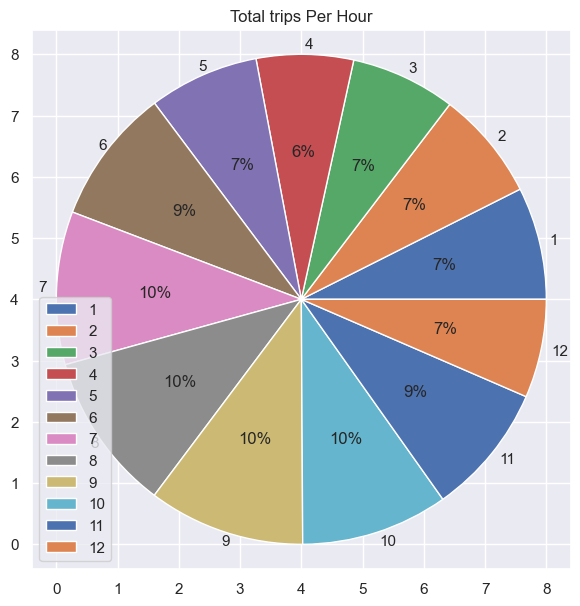

In [31]:
sns.set_theme(context = 'notebook',style = 'darkgrid')
plt.figure(figsize=(10,7))
plt.title('Total trips Per Hour')
plt.pie(x = d['Hour_count'],labels = d.index,labeldistance = 1.04,autopct='%.0f%%',
        frame = True,pctdistance=0.6,center = (4,4),radius=4)
plt.legend(d.index)

### 5) Total trips per weekday

In [32]:
df['tpep_pickup_datetime'].dt.day_name().iloc[101:106]

101    Wednesday
102    Wednesday
103    Wednesday
104    Wednesday
105    Wednesday
Name: tpep_pickup_datetime, dtype: object

In [33]:
# Countng the weekdays Vs Counts
d = pd.DataFrame()
df['WeekDay'] = df['tpep_pickup_datetime'].dt.day_name()
d['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.day_name().value_counts()
d['trip_count'] = df[['WeekDay','trip_distance']].groupby('WeekDay').sum()
d

,tpep_pickup_datetime,trip_count
tpep_pickup_datetime,,
Wednesday,1887655,5191424.23
Friday,1828533,4984726.99
Thursday,1791711,4944056.56
Tuesday,1660721,4490653.42
Saturday,1615616,4296717.77
Monday,1457622,4318931.94
Sunday,1394039,4257672.66


Text(0.5, 1.0, 'Frequency At WeekDays')

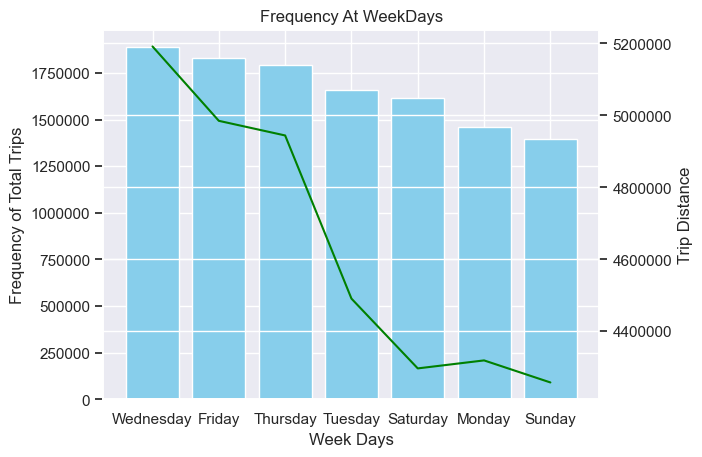

In [34]:
# plotting
fig,ax1 = plt.subplots(1,1)
ax1.bar(height = d['tpep_pickup_datetime'], x= d.index,color = ['skyblue'])
ax2 = ax1.twinx()
ax2.plot(d['trip_count'],color = 'green')

# Set Labels
ax1.ticklabel_format(axis = 'y',style = 'plain')
ax2.ticklabel_format(axis = 'y',style = 'plain')
ax1.set_xlabel('Week Days')
ax1.set_ylabel('Frequency of Total Trips')
ax2.set_ylabel('Trip Distance')
ax1.set_title('Frequency At WeekDays')

In [35]:
# plotting Hour count of trip For Each Week Day
d['Days'] = d.index
d

,tpep_pickup_datetime,trip_count,Days
tpep_pickup_datetime,,,
Wednesday,1887655,5191424.23,Wednesday
Friday,1828533,4984726.99,Friday
Thursday,1791711,4944056.56,Thursday
Tuesday,1660721,4490653.42,Tuesday
Saturday,1615616,4296717.77,Saturday
Monday,1457622,4318931.94,Monday
Sunday,1394039,4257672.66,Sunday


([<matplotlib.axis.XTick at 0x2a88c2de030>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

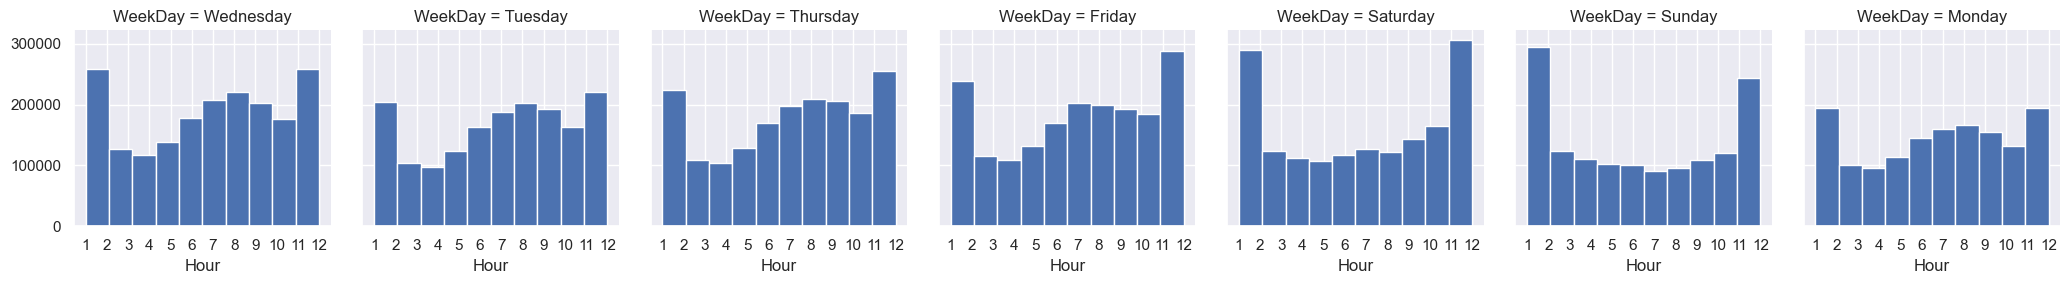

In [36]:
g= sns.FacetGrid(df,col= 'WeekDay',palette = 'Set1')
g.map(plt.hist,'Hour')
plt.xticks(np.arange(1,13))

### 6) Total trips per month

In [37]:
df.head(2)

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Month,Day,year,trip_duration,Hour,WeekDay
0,0,1,2020-01-01 12:28:15,2020-01-01 12:33:03,1,1.2,1,1,6.0,3.0,...,0.0,0.3,11.27,2.5,1,1,2020,0 days 00:04:48,12,Wednesday
1,1,1,2020-01-01 12:35:39,2020-01-01 12:43:04,1,1.2,1,1,7.0,3.0,...,0.0,0.3,12.30,2.5,1,1,2020,0 days 00:07:25,12,Wednesday


In [38]:
df.value_counts('Month')

Month
1     6239870
2     5395813
12        147
7          42
3          12
5           8
4           4
6           1
Name: count, dtype: int64

C:\Users\gamin\AppData\Local\Temp\ipykernel_7468\1705835975.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = df.value_counts('Month') , x = df.value_counts('Month').index,palette='Set1')


<Axes: title={'center': 'No of Trips Vs Month'}, xlabel='Month', ylabel='count'>

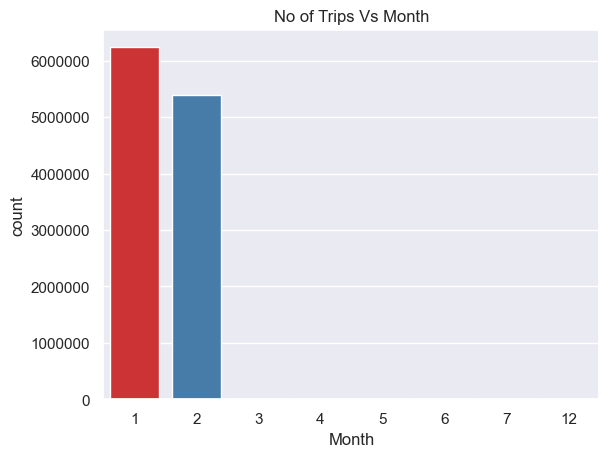

In [39]:
# plotting
plt.ticklabel_format(axis = 'y',style = 'plain')
plt.title('No of Trips Vs Month')
sns.barplot(y = df.value_counts('Month') , x = df.value_counts('Month').index,palette='Set1')

### 7 Bivariate Analysis
- Bivariate analysis is used to find out if there is a relationship between two sets of values. It usually involves the variables X and Y.

#### A Trip Duration Per Hour

In [40]:
d= df.groupby('Hour')['trip_distance'].sum()
d.head()

Hour
1    2431477.78
2    2407373.11
3    2312965.29
4    2248687.95
5    2445447.83
Name: trip_distance, dtype: float64

Text(0.5, 1.0, 'Trip Distance Vs Hour')

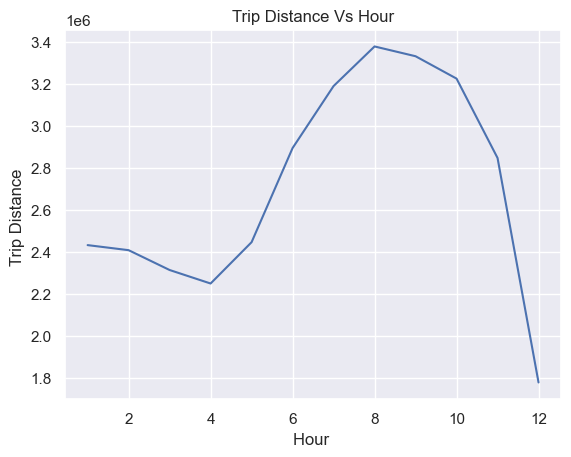

In [41]:
# Plotting the data
sns.lineplot(y=d,x = d.index)
plt.xlabel('Hour ')
plt.ylabel('Trip Distance ')
plt.title('Trip Distance Vs Hour')

- Lowest Hour was 12
- highest Hour was 8
- between hour 6 and 12 most no of traffic is seen

#### B Trip duration per WeekDay

In [42]:
# CConvert to Minutes
df['trip_duration'] = df['trip_duration'].transform(lambda x : x.seconds/60)

In [43]:
df.head(2)

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Month,Day,year,trip_duration,Hour,WeekDay
0,0,1,2020-01-01 12:28:15,2020-01-01 12:33:03,1,1.2,1,1,6.0,3.0,...,0.0,0.3,11.27,2.5,1,1,2020,4.800000,12,Wednesday
1,1,1,2020-01-01 12:35:39,2020-01-01 12:43:04,1,1.2,1,1,7.0,3.0,...,0.0,0.3,12.30,2.5,1,1,2020,7.416667,12,Wednesday


In [44]:
d = df.groupby('Month')['trip_duration'].sum()
d

Month
1     9.755186e+07
2     8.541643e+07
3     1.401100e+03
4     4.564000e+02
5     2.377717e+03
6     3.448333e+01
7     5.164333e+02
12    3.646188e+04
Name: trip_duration, dtype: float64

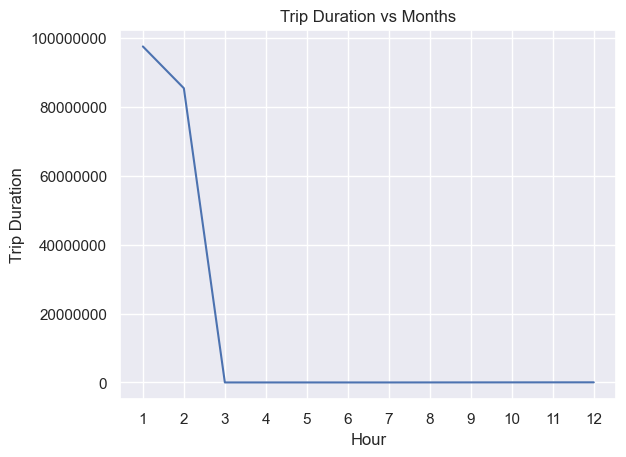

In [45]:
# plotting
sns.lineplot(x = d.index, y = d)
plt.xlabel('Hour')
plt.ylabel('Trip Duration')
plt.title('Trip Duration vs Months')
plt.xticks(np.arange(1,13))
# Turn off scientific notation for both axes
plt.ticklabel_format(style='plain', axis='both')  # Turn off scientific notation

In [46]:
df.groupby('Month')['trip_duration'].count()

Month
1     6239870
2     5395813
3          12
4           4
5           8
6           1
7          42
12        147
Name: trip_duration, dtype: int64

- Highest Hour was 1
- Data for Months 3 -12 is Not Much Available So much Predictions cant be made

#### C Trip duration per vendor

In [47]:
d = df.groupby('VendorID')['trip_duration'].sum()
d

VendorID
1    4.981234e+07
2    1.331972e+08
Name: trip_duration, dtype: float64

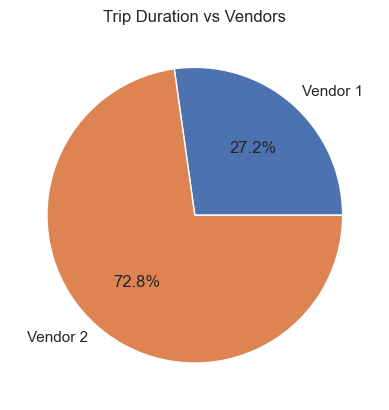

In [48]:
# plotting
plt.pie(x =d ,labels = [f'Vendor {i}' for i in  d.index],autopct='%1.1f%%')
plt.title('Trip Duration vs Vendors')
# Turn off scientific notation for both axes
plt.ticklabel_format(style='plain', axis='both')  # Turn off scientific notation

#### D Distance per Weekday

In [49]:
d = df.groupby('WeekDay')['trip_distance'].sum()
d.head(2)

WeekDay
Friday    4984726.99
Monday    4318931.94
Name: trip_distance, dtype: float64

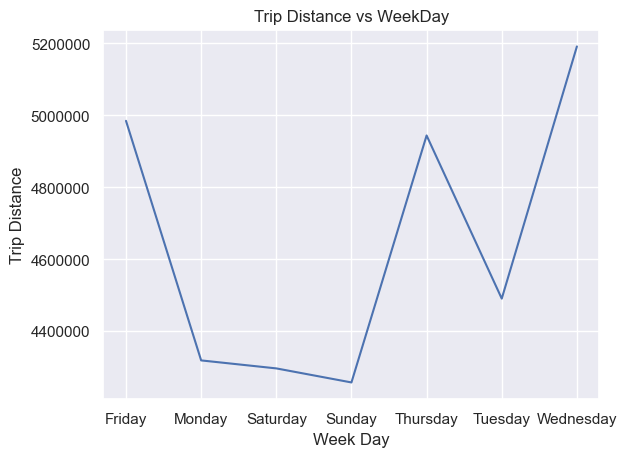

In [50]:
# plotting
sns.lineplot(x = d.index, y = d)
plt.xlabel('Week Day')
plt.ylabel('Trip Distance')
plt.title('Trip Distance vs WeekDay')
# Turn off scientific notation for both axes
plt.ticklabel_format(style='plain', axis='y')  # Turn off scientific notation

#### E Distance v/s Trip duration

In [51]:
sizes = np.arange(0,df['trip_duration'].count())
sizes = [1 for i in range(len(df['trip_distance']))] # list of 1
len(sizes)

11635897

Text(0.5, 1.0, 'Trip Distance vs Trip duration')

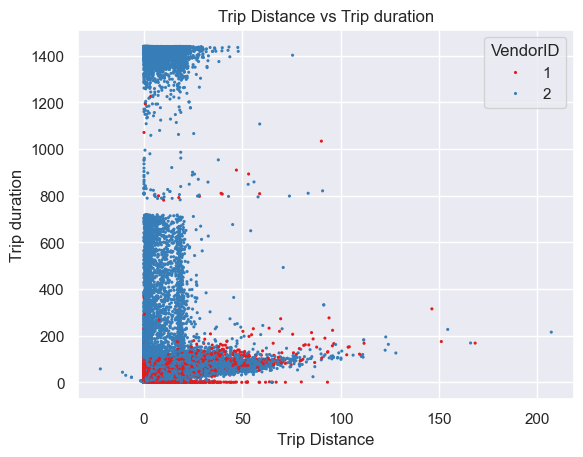

In [52]:
sns.scatterplot(x= df['trip_distance'] , y = df['trip_duration'][df['trip_duration']>0]
                ,hue = df['VendorID'],s = 5,edgecolors = 'none',palette='Set1')
plt.ylabel('Trip duration')
plt.xlabel('Trip Distance')
plt.title('Trip Distance vs Trip duration')

- There are lots of trips which covered negligible distance but clocked a lot of  seconds in terms of the Duration.
- Most Of Trip Distance lies below 50

In [53]:
sns.scatterplot(y = df['trip_distance'][df['trip_distance'] < 50] , x = df['trip_distance'],
                             hue = df['VendorID'],s = 10,edgecolors = 'none',palette='Set1')
plt.ylabel('Trip duration')
plt.xlabel('Trip Distance')
plt.title('Trip Distance vs Trip duration')

- On observing we can cleary see there is a linear relationship bw=etween the trip duration and distance 

#### F Fare Amount Vs trip Distance

In [54]:
df.columns

Index(['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Month', 'Day', 'year', 'trip_duration', 'Hour', 'WeekDay'],
      dtype='object')

C:\Users\gamin\AppData\Local\Temp\ipykernel_7468\4169886737.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sc = sns.scatterplot(y = df['fare_amount'] , x = df['trip_distance']


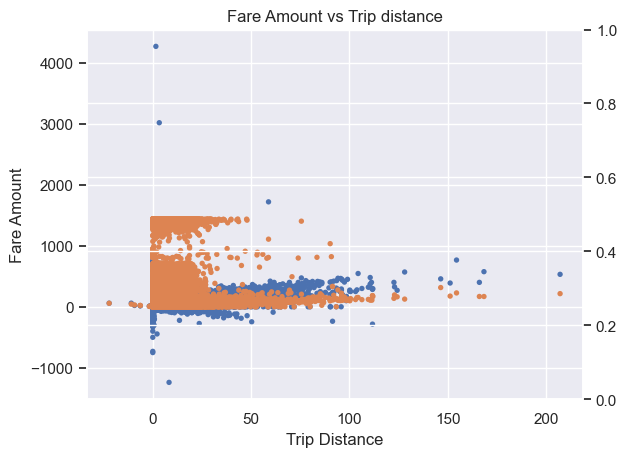

In [66]:
sc = sns.scatterplot(y = df['fare_amount'] , x = df['trip_distance']
                ,s = 15,edgecolors = 'none',palette='Set1')
sc.set_ylabel('Fare Amount')
sc.set_xlabel('Trip Distance')
sc.set_title('Fare Amount vs Trip distance')

sc.twinx()
sc.scatter(y = df['trip_duration'] , x = df['trip_distance'],facecolors = 'C1',s = 15
           ,edgecolors = 'none')

#### 8) Monthly Data Plotting

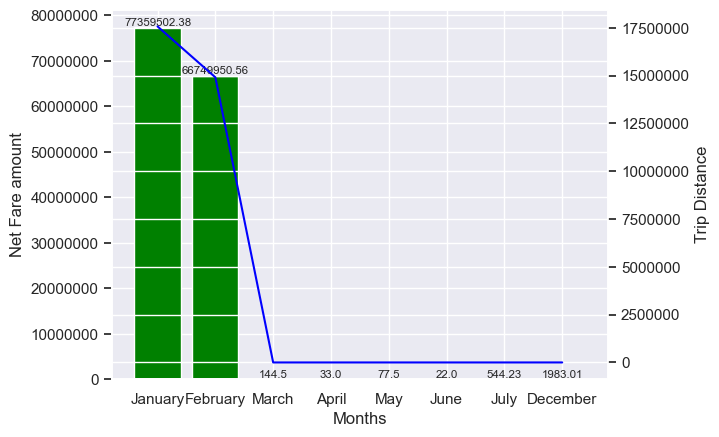

In [56]:
# Mothhly data Plotting

colors = 'blue'

sns.set_theme(context='notebook',style = 'darkgrid')
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
# Turn off scientific notation for both axes
ax1.ticklabel_format(style='plain', axis='both')  # Turn off scientific notation
ax2.ticklabel_format(style='plain', axis='both')  # Turn off scientific notation

bars = ax1.bar(height = df[['Month','fare_amount']].groupby('Month').sum()['fare_amount'], 
            x =  [month_map[i] for i in  df[['Month','fare_amount']].groupby('Month').count().index]
         ,color = 'green')


# make plot for trip distance
plot = ax2.plot([month_map[i] for i in  df[['Month','trip_distance']].groupby('Month').count().index],
                df[['Month','trip_distance']].groupby('Month').sum()['trip_distance']           
         ,color = colors)

# set titles
plt.xticks(rotation='vertical') 
ax1.set_xlabel('Months')
ax2.set_ylabel('Trip Distance')
ax1.set_ylabel('Net Fare amount')

# show the text on bar
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom',fontsize = 'x-small')



In [57]:
# Color Set
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

C:\Users\gamin\AppData\Local\Temp\ipykernel_7468\50995816.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\gamin\AppData\Local\Temp\ipykernel_7468\50995816.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\gamin\AppData\Local\Temp\ipykernel_7468\50995816.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\gamin\AppData\Local\Temp\ipykernel_7468\50995816.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\gamin\AppData\Local\Temp\ipykernel_7468\50995816.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\gamin\AppData\Local\Temp\ipykernel_7468\50995816.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\gamin\AppData\Local\Temp\ipykernel_7468\50995816.py:38: UserWarning: FigureCanv

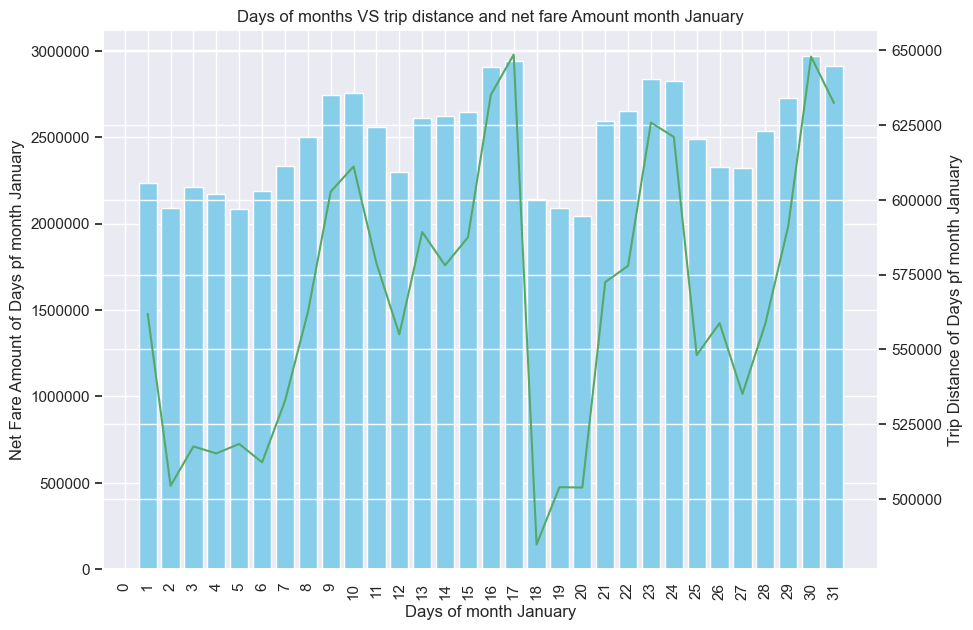

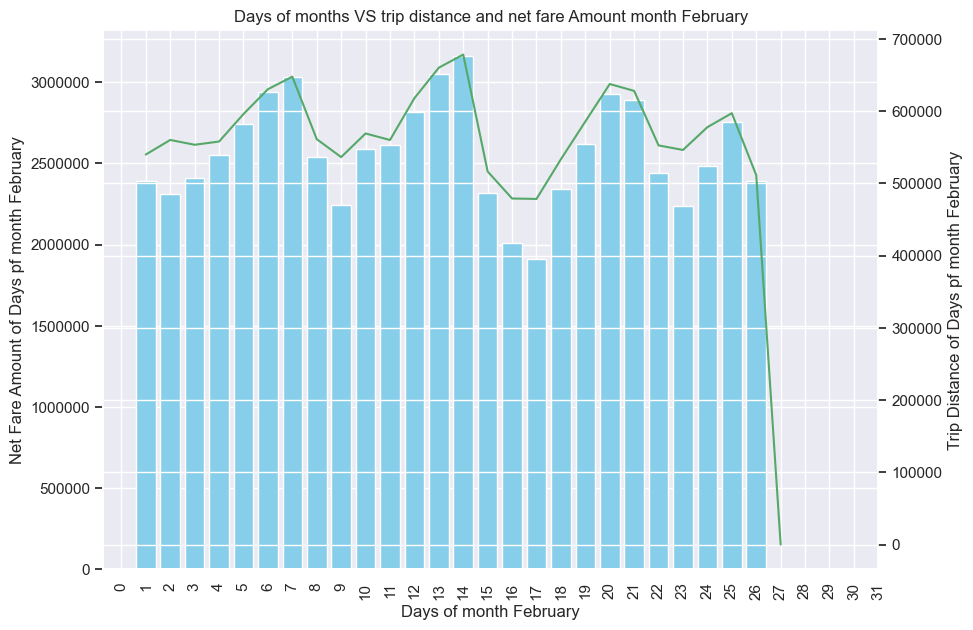

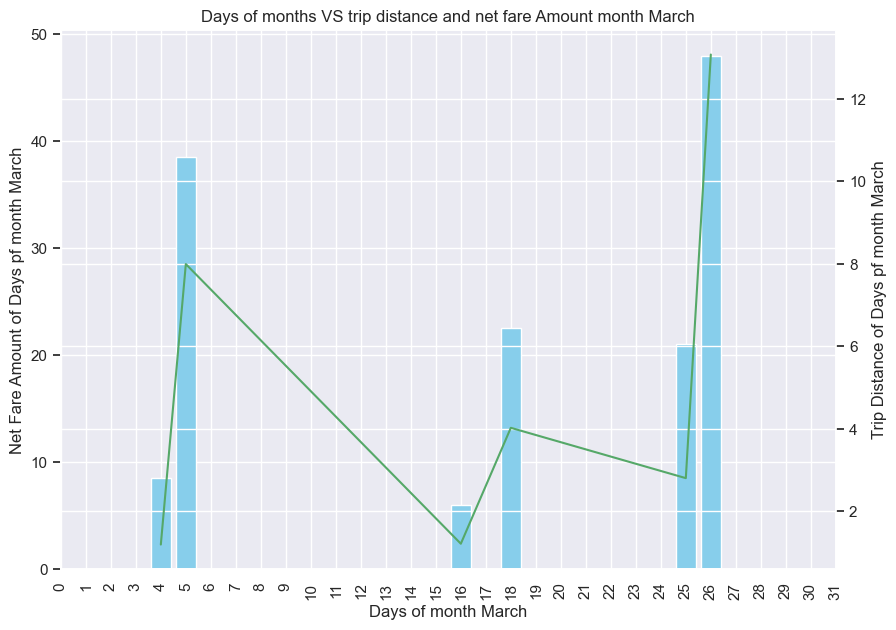

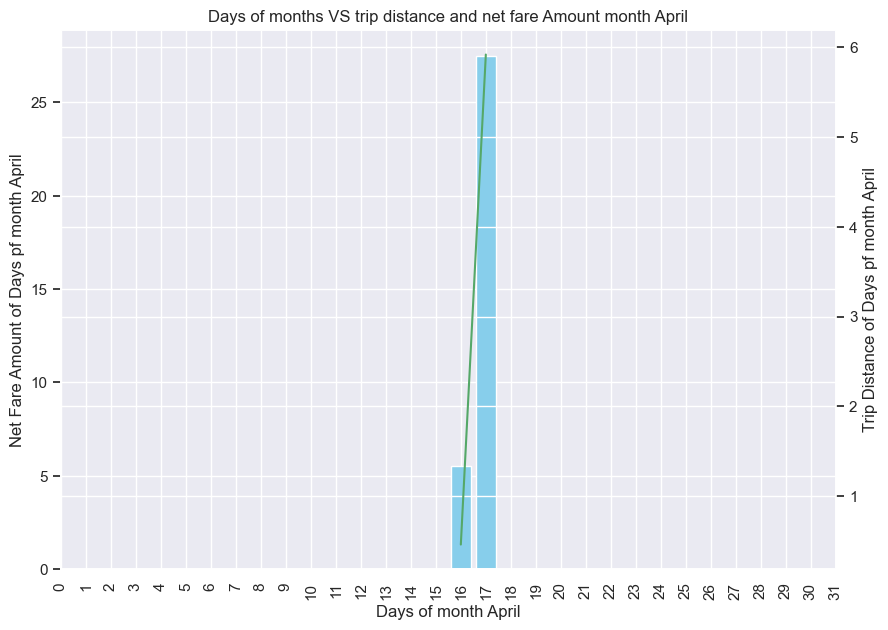

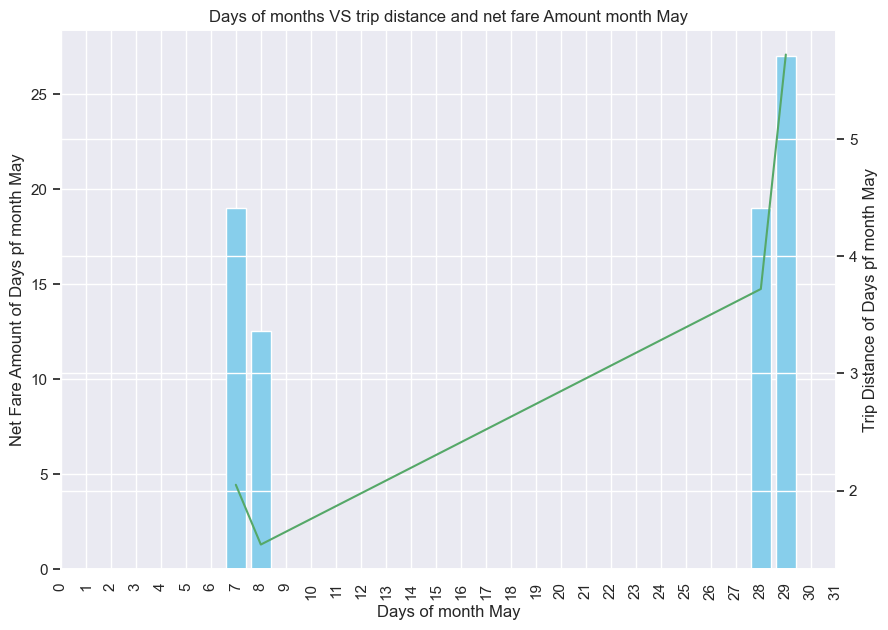

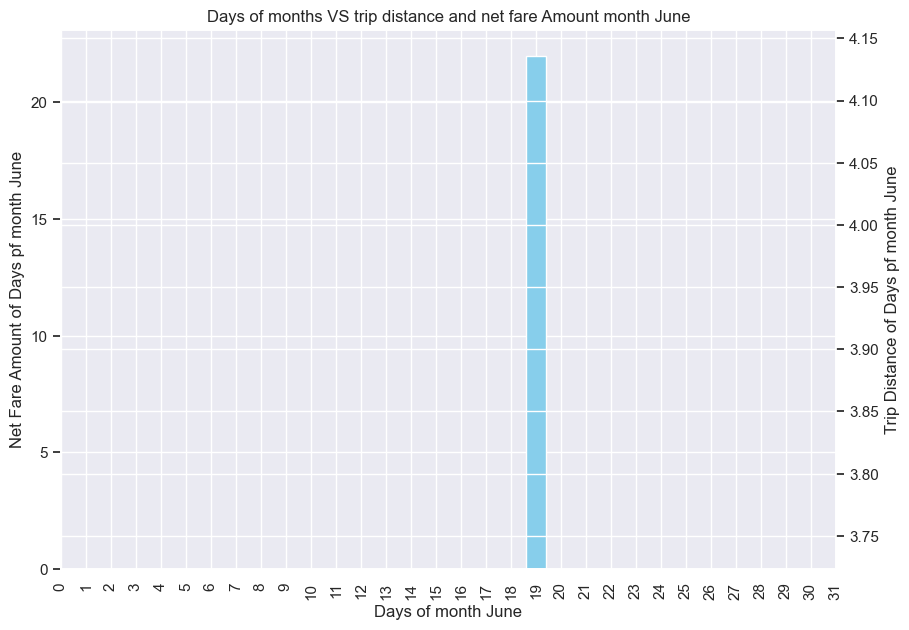

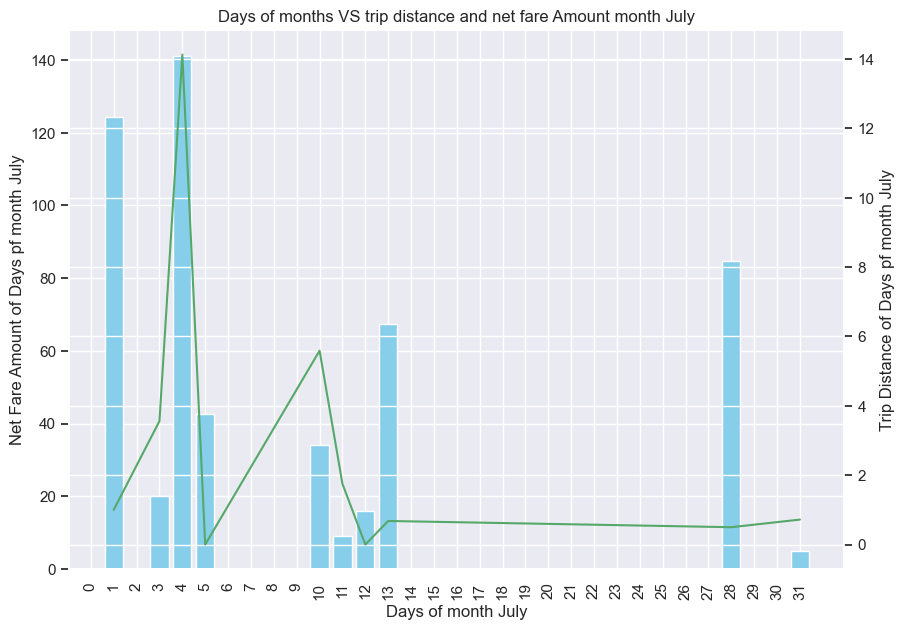

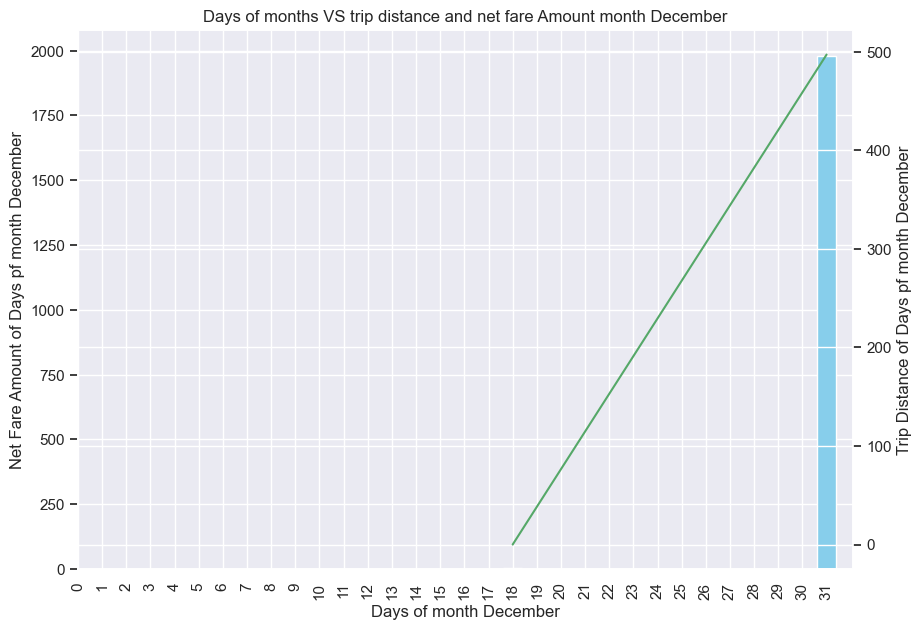

In [58]:
# plot wit secondary axis
#days = df.groupby(['Month','Day'])[['fare_amount','trip_distance']].sum().loc[1,:].index.get_level_values(0)

for month in np.unique(df.groupby(['Month','Day'])['fare_amount'].sum().index.get_level_values(0)):
    
        day_index = df.groupby(['Month','Day'])['fare_amount'].sum().loc[month,:].index.get_level_values(0)
        day_values =  df.groupby(['Month','Day'])['fare_amount'].sum().loc[month,:]
        trip_dis_val = df.groupby(['Month','Day'])['trip_distance'].sum().loc[month,:]

        # plotting

        fig,ax = plt.subplots()
        fig.set_figheight(7)
        fig.set_figwidth(10)

        # Secondary axis
        ax2 = ax.twinx()
        ax.bar(x = day_index
                ,height = day_values,color = 'skyblue')
        
        ax2.plot(day_index,
                trip_dis_val
                ,color = 'g')
    

        # Turn off scientific notation for both axes
        ax.ticklabel_format(style='plain', axis='both')  # Turn off scientific notation
        ax2.ticklabel_format(style='plain', axis='both')  # Turn off scientific notation

        # set titles
        ax.set_title(f'Days of months VS trip distance and net fare Amount month {month_map[month]}')
        ax.set_xticks(ticks = np.arange(0,32),labels=np.arange(0,32),
                     rotation = 'vertical') 
        ax.set_xlabel(f'Days of month {month_map[month]}')
        ax2.set_ylabel(f'Trip Distance of Days pf month {month_map[month]}')
        ax.set_ylabel(f'Net Fare Amount of Days pf month {month_map[month]}')

        fig.show()

- Less data was available for the months 3-12 which is a cause of empty graphs

# --------------END-------------